# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

### Importando as bases

In [103]:
import pandas as pd
import matplotlib.pyplot as plt


cadastro_funcionarios = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')
cadastro_clientes = pd.read_csv(r'CadastroClientes.csv', sep=';', decimal=',')
base_servicos = pd.read_excel(r'BaseServiçosPrestados.xlsx')
display(cadastro_funcionarios)
display(cadastro_clientes)
display(base_servicos)

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [5]:
cadastro_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             320 non-null    int64 
 1   Cliente                320 non-null    object
 2   Valor Contrato Mensal  320 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.6+ KB


# O que queremos saber/fazer?

### 1) Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?
Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários

In [6]:
cadastro_funcionarios['Folha Salarial'] = cadastro_funcionarios['Salario Base'] + cadastro_funcionarios['Impostos'] + cadastro_funcionarios['Beneficios'] + cadastro_funcionarios['VT'] + cadastro_funcionarios['VR']
cadastro_funcionarios
display(cadastro_funcionarios['Folha Salarial'].sum())

2717493.22

### 2. Qual foi o faturamento da empresa?
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

In [7]:
faturamento = base_servicos[['Tempo Total de Contrato (Meses)', 'ID Cliente']].merge(cadastro_clientes[['Valor Contrato Mensal', 'ID Cliente']], on='ID Cliente')
faturamento

,Tempo Total de Contrato (Meses),ID Cliente,Valor Contrato Mensal
0,14,1,540
1,12,2,1260
2,14,4,2520
3,8,5,3510
4,8,6,2340
...,...,...,...
232,4,315,1575
233,8,316,3690
234,6,317,2385
235,14,319,4185


In [95]:
faturamento['Faturamento Total'] = faturamento['Tempo Total de Contrato (Meses)'] * faturamento['Valor Contrato Mensal']
print('O valor total de faturamento da empresa é de: R$ {:.2f}'.format(faturamento['Faturamento Total'].sum()))

O valor total de faturamento da empresa é de: R$ 5519160.00


### 3. Qual o % de funcionários que já fechou algum contrato?

In [17]:
Qtde_Funcionarios_Fecharam_Serviço = len(base_servicos['ID Funcionário'].unique())
Qtde_Funcionários_Totais = len(cadastro_funcionarios['ID Funcionário'])

print('O percentual de funcionários que já fecharam contrato é de {:.2%}'.format(Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais))

O percentual de funcionários que já fecharam contrato é de 86.84%


### 4. Calcule o total de contratos que cada área da empresa já fechou


<AxesSubplot:title={'center':'Total de Contratos Por Área'}>

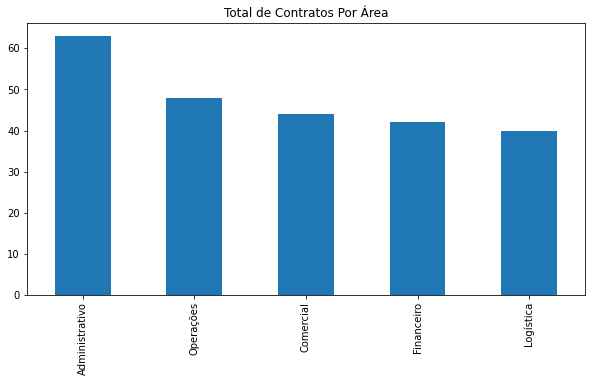

In [102]:
total_contratos_por_area = base_servicos[['ID Funcionário']].merge(cadastro_funcionarios[['ID Funcionário','Area']], on = 'ID Funcionário')
contratos_area_qtde = total_contratos_por_area['Area'].value_counts()
contratos_area_qtde
contratos_area_qtde.plot( kind='bar', title = 'Total de Contratos Por Área', figsize=(10,5))

### 5. Calcule o total de funcionários por área


Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

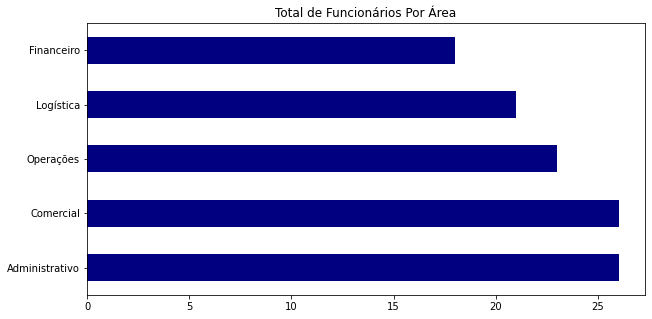

In [120]:
total_funcis_por_area = cadastro_funcionarios['Area'].value_counts()

total_funcis_por_area.plot(kind= 'barh', figsize=(10,5), colormap='jet', title = 'Total de Funcionários Por Área')
total_funcis_por_area

### 6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [41]:
print('O ticket médio mensal dos contratos é de: R$ {:.2f}'.format(cadastro_clientes['Valor Contrato Mensal'].mean()))

O ticket médio mensal dos contratos é de: R$ 2502.56
